# Using Linear Regression

## Importing Libraries and Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Importing the data (is treated)
df = pd.read_csv('data/BRAZIL_CITIES_REV2022_CLEANED.csv')

# Separating the data into features and target
X = df.drop('IDHM', axis=1)
y = df['IDHM']

# See the number of features and target
print(f'Number of features: {X.shape[1]}')

Number of features: 64


## Training the Model

### Linear Regression changing n_components of PCA and changing K-Fold

Results for variating n_components and K-Fold: 
Best R2 score: 0.5638, with 13 components and 4-Fold CV
Best MAE: 0.0209
Best MSE: 0.0007
Best RMSE: 0.0262


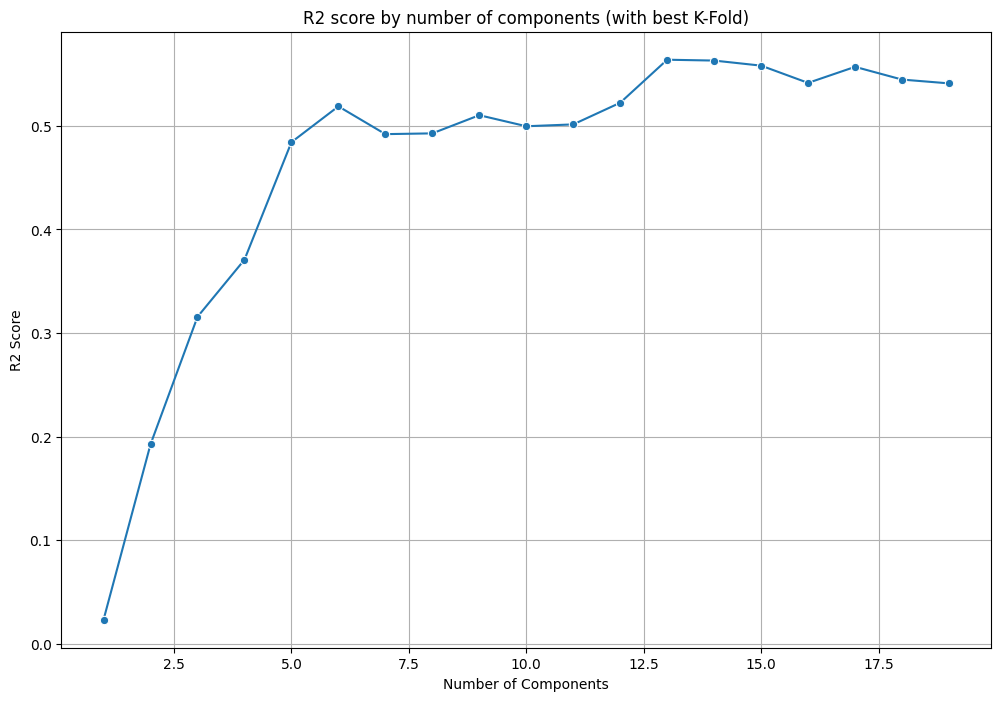

In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Applying PCA to the data (1 to 19 components), applying Linear Regression and plotting the results
results = []
mae_list = []
mse_list = []
rmse_list = []
n_components = list(range(1, 20))  # Varying the number of components from 1 to 19
n_folds = list(range(2, 31))  # Varying K-Fold from 2 to 30

# Varying both n_components and n_folds
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    model = LinearRegression()
    
    for k in n_folds:
        kf = KFold(n_splits=k, shuffle=True, random_state=24)
        
        # Cross-validation
        scores = cross_val_score(model, X_pca, y, cv=kf, scoring='r2')
        results.append((n, k, scores.mean()))
        
        # Fit model on the entire dataset for error metrics
        model.fit(X_pca, y)
        y_pred = model.predict(X_pca)
        
        mae_list.append((n, k, mean_absolute_error(y, y_pred)))
        mse_list.append((n, k, mean_squared_error(y, y_pred)))
        rmse_list.append((n, k, np.sqrt(mean_squared_error(y, y_pred))))
    
# Extracting the best result
best_result = max(results, key=lambda x: x[2])
best_n, best_k, best_r2 = best_result

best_mae = next(mae for n, k, mae in mae_list if n == best_n and k == best_k)
best_mse = next(mse for n, k, mse in mse_list if n == best_n and k == best_k)
best_rmse = next(rmse for n, k, rmse in rmse_list if n == best_n and k == best_k)

# Plotting the R2 score by number of components (with their best k-folds)
df_results = pd.DataFrame(results, columns=['n_components', 'n_folds', 'r2'])

# Find the best k-fold for each n_components
best_k_folds = df_results.loc[df_results.groupby('n_components')['r2'].idxmax()]

print('Results for variating n_components and K-Fold: ')
print(f'Best R2 score: {best_r2:.4f}, with {best_n} components and {best_k}-Fold CV')
print(f'Best MAE: {best_mae:.4f}')
print(f'Best MSE: {best_mse:.4f}')
print(f'Best RMSE: {best_rmse:.4f}')

plt.figure(figsize=(12, 8))
sns.lineplot(data=best_k_folds, x='n_components', y='r2', marker='o')
plt.title('R2 score by number of components (with best K-Fold)')
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

### Linear Regression changing only n_components of the PCA

Results for varying n_components only:
Best R2 score: 0.6639 with 19 components
Best MAE: 0.0200
Best MSE: 0.0006
Best RMSE: 0.0255


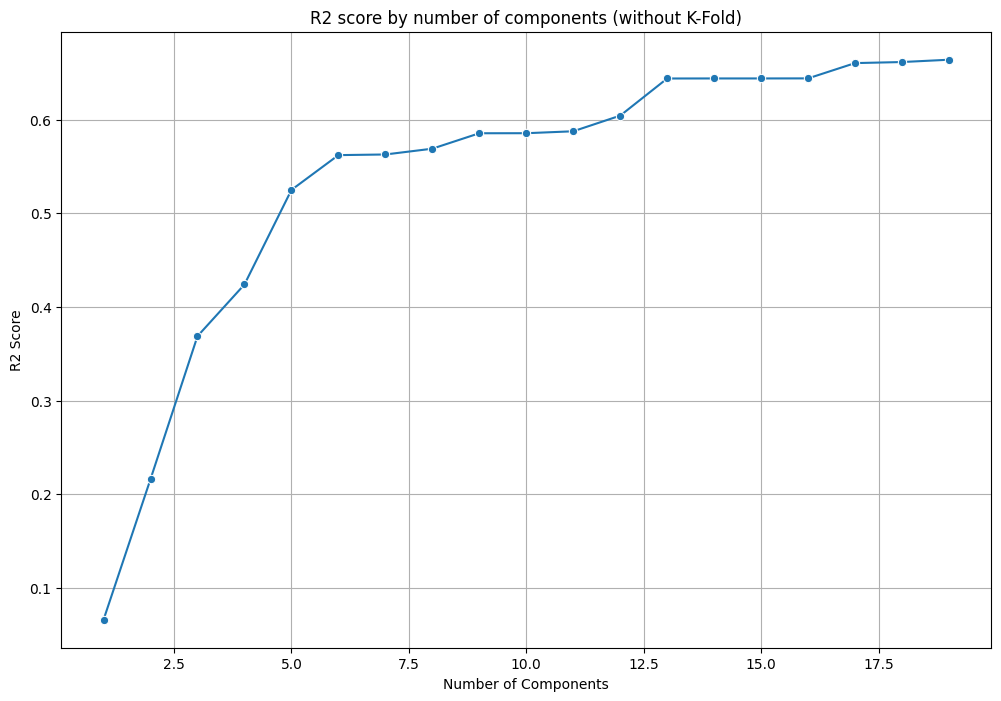

In [21]:
# Testing with varying n_components only (no K-Fold)
mae_no_kfold = []
mse_no_kfold = []
rmse_no_kfold = []
results_no_kfold = []
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    model = LinearRegression()
    
    # Fit model on the entire dataset for error metrics
    model.fit(X_pca, y)
    y_pred = model.predict(X_pca)
    
    mae_no_kfold.append(mean_absolute_error(y, y_pred))
    mse_no_kfold.append(mean_squared_error(y, y_pred))
    rmse_no_kfold.append(np.sqrt(mean_squared_error(y, y_pred)))
    results_no_kfold.append((n, model.score(X_pca, y)))

# Find the best R2 score and corresponding number of components
best_r2 = max(results_no_kfold, key=lambda x: x[1])
best_mae = min(mae_no_kfold)
best_mse = min(mse_no_kfold)
best_rmse = min(rmse_no_kfold)

print('Results for varying n_components only:')
print(f'Best R2 score: {best_r2[1]:.4f} with {best_r2[0]} components')
print(f'Best MAE: {best_mae:.4f}')
print(f'Best MSE: {best_mse:.4f}')
print(f'Best RMSE: {best_rmse:.4f}')

# Plotting results for varying n_components only
df_results_no_kfold = pd.DataFrame(results_no_kfold, columns=['n_components', 'r2'])
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_results_no_kfold, x='n_components', y='r2', marker='o')
plt.title('R2 score by number of components (without K-Fold)')
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

### Linear Regression changing only K-Fold

Results for varying K-Fold only (no PCA):
Best R2 score by K-Fold (no PCA): 0.3629 with 5-Fold CV
Best MAE by K-Fold (no PCA): 0.0172
Best MSE by K-Fold (no PCA): 0.0005
Best RMSE by K-Fold (no PCA): 0.0221


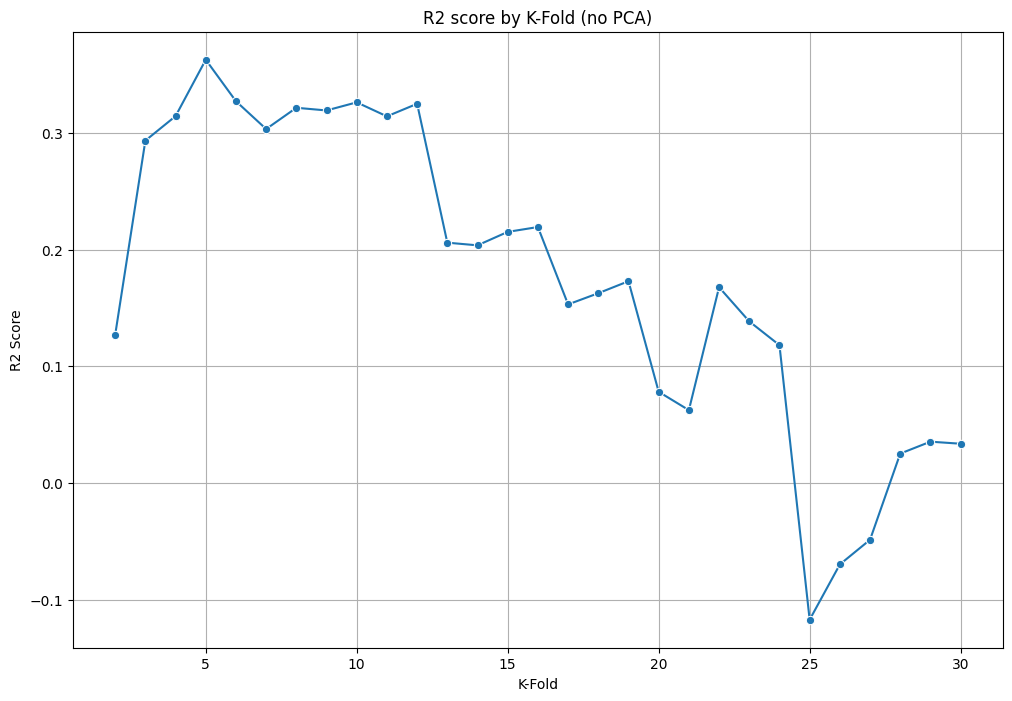

In [22]:
# Testing with varying K-Fold only (no PCA)
mae_no_pca = []
mse_no_pca = []
rmse_no_pca = []
results_no_pca = []
for k in n_folds:
    model = LinearRegression()
    kf = KFold(n_splits=k, shuffle=True, random_state=24)
    
    # Cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results_no_pca.append((k, scores.mean()))
    
    # Fit model on the entire dataset for error metrics
    model.fit(X, y)
    y_pred = model.predict(X)
    
    mae_no_pca.append(mean_absolute_error(y, y_pred))
    mse_no_pca.append(mean_squared_error(y, y_pred))
    rmse_no_pca.append(np.sqrt(mean_squared_error(y, y_pred)))
    
# Find the best results
best_r2_no_pca = max(results_no_pca, key=lambda x: x[1])
best_k_no_pca = best_r2_no_pca[0]
best_r2_score_no_pca = best_r2_no_pca[1]

best_mae_no_pca = mae_no_pca[n_folds.index(best_k_no_pca)]
best_mse_no_pca = mse_no_pca[n_folds.index(best_k_no_pca)]
best_rmse_no_pca = rmse_no_pca[n_folds.index(best_k_no_pca)]

print('Results for varying K-Fold only (no PCA):')
print(f'Best R2 score by K-Fold (no PCA): {best_r2_score_no_pca:.4f} with {best_k_no_pca}-Fold CV')
print(f'Best MAE by K-Fold (no PCA): {best_mae_no_pca:.4f}')
print(f'Best MSE by K-Fold (no PCA): {best_mse_no_pca:.4f}')
print(f'Best RMSE by K-Fold (no PCA): {best_rmse_no_pca:.4f}')

# Plotting results for varying K-Fold only
df_results_no_pca = pd.DataFrame(results_no_pca, columns=['n_folds', 'r2'])
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_results_no_pca, x='n_folds', y='r2', marker='o')
plt.title('R2 score by K-Fold (no PCA)')
plt.xlabel('K-Fold')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

### Simple Linear Regression

In [23]:
# Testing without PCA and without K-Fold
model_no_pca = LinearRegression()
model_no_pca.fit(X, y)
y_pred_no_pca = model_no_pca.predict(X)

r2_no_pca = model_no_pca.score(X, y)
mae_no_pca = mean_absolute_error(y, y_pred_no_pca)
mse_no_pca = mean_squared_error(y, y_pred_no_pca)
rmse_no_pca = np.sqrt(mse_no_pca)

print('Results without PCA and K-Fold: ')
print(f'Best R2 score without PCA and K-Fold: {r2_no_pca:.4f}')
print(f'Best MAE without PCA and K-Fold: {mae_no_pca:.4f}')
print(f'Best MSE without PCA and K-Fold: {mse_no_pca:.4f}')
print(f'Best RMSE without PCA and K-Fold: {rmse_no_pca:.4f}')

Results without PCA and K-Fold: 
Best R2 score without PCA and K-Fold: 0.7468
Best MAE without PCA and K-Fold: 0.0172
Best MSE without PCA and K-Fold: 0.0005
Best RMSE without PCA and K-Fold: 0.0221


## Graph all the results

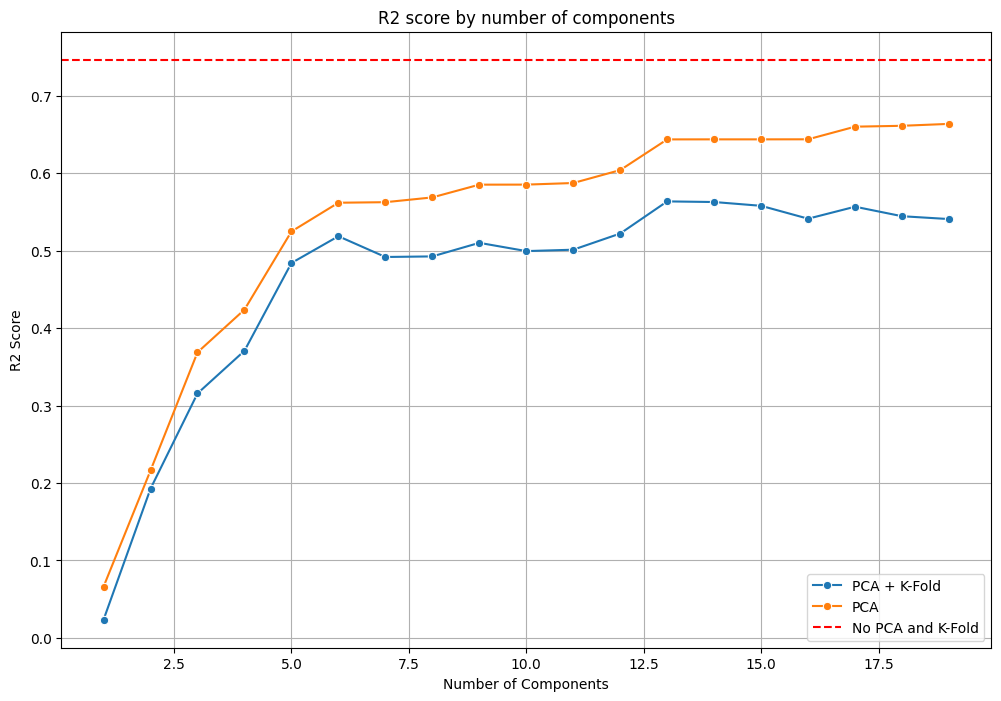

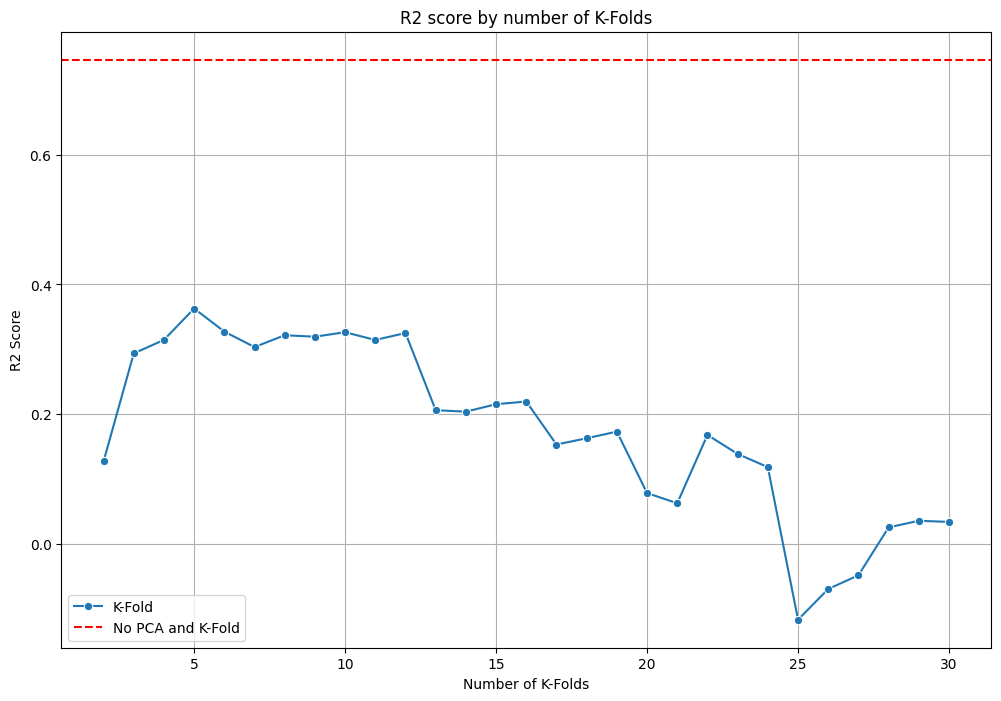

In [24]:
# First plot with n_components on the x-axis
plt.figure(figsize=(12, 8))
sns.lineplot(data=best_k_folds, x='n_components', y='r2', marker='o', label='PCA + K-Fold')
sns.lineplot(data=df_results_no_kfold, x='n_components', y='r2', marker='o', label='PCA')
plt.axhline(r2_no_pca, color='red', linestyle='--', label='No PCA and K-Fold')
plt.title('R2 score by number of components')
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.grid(True)
plt.legend()
plt.show()

# Second plot with n_folds on the x-axis
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_results_no_pca, x='n_folds', y='r2', marker='o', label='K-Fold')
plt.axhline(r2_no_pca, color='red', linestyle='--', label='No PCA and K-Fold')
plt.title('R2 score by number of K-Folds')
plt.xlabel('Number of K-Folds')
plt.ylabel('R2 Score')
plt.grid(True)
plt.legend()
plt.show()

## Results

The best result was obtained using Linear Regression withou the use of PCA and K-Fold, with a R² of 0.7468